In [2]:
library(ggplot2)
library(plyr)
library(dplyr)
library(data.table)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(ggsignif) 
library(ggpubr) 
library(reshape2)
library(ggsci) 
library(stringr)
library(ggvenn)
library(ggpubr)

library(dowser)
library(ggtree)

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) 
options(repr.plot.width = 6, repr.plot.height = 6)


载入程辑包：'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



载入程辑包：'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v lubridate 1.9.2     v stringr   1.5.0
v purrr     1.0.1     v tibble    3.2.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()      masks plyr::arrange()
x data.table::between() masks dplyr::between()
x purrr::compact()      masks plyr::compact()
x dplyr::count()        masks plyr::count()
x dplyr::desc()         masks plyr::desc()
x dplyr::failwith()     masks plyr::failwith()
x dplyr::filte

In [3]:
#IG类型比较
mypal <- ggsci::pal_npg(palette ="nrc", alpha = 0.7)(10)
mypal2<-ggsci::pal_jama(palette ="default", alpha = 0.7)(6)
mypal3<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.7)(9)
mypal4 <- ggsci::pal_npg(palette ="nrc", alpha = 0.5)(10)
mypal5<-ggsci::pal_jama(palette ="default", alpha = 0.5)(6)
mypal6<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.5)(9)
mypal7 <- ggsci::pal_npg(palette ="nrc", alpha = 0.3)(10)
mypal8<-ggsci::pal_jama(palette ="default", alpha = 0.3)(6)
mypal9<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.3)(9)

mypal<-c(mypal3,mypal2,mypal,mypal6,mypal5,mypal4,mypal9,mypal8,mypal7)
mypal[3]<-"#FFBD7A"


## 1.2 读取ggtree rds

In [4]:
clone1_1000_tree_data<-readRDS("RDS_file_new/clone.177001.178000.rds")

In [5]:
#IG类型比较
mypal <- ggsci::pal_npg(palette ="nrc", alpha = 0.7)(10)
mypal2<-ggsci::pal_jama(palette ="default", alpha = 0.7)(6)
mypal3<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.7)(9)
mypal4 <- ggsci::pal_npg(palette ="nrc", alpha = 0.5)(10)
mypal5<-ggsci::pal_jama(palette ="default", alpha = 0.5)(6)
mypal6<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.5)(9)
mypal7 <- ggsci::pal_npg(palette ="nrc", alpha = 0.3)(10)
mypal8<-ggsci::pal_jama(palette ="default", alpha = 0.3)(6)
mypal9<-ggsci::pal_lancet(palette ="lanonc", alpha = 0.3)(9)

mypal<-c(mypal3,mypal2,mypal,mypal6,mypal5,mypal4,mypal9,mypal8,mypal7)
mypal[3]<-"#FFBD7A"

## Fig6D

In [6]:
clone1_1000_tree_data$data[[1]]@data$sample=str_split_fixed(clone1_1000_tree_data$data[[1]]@data$sequence_id,pattern="_",3)[,1]
clone1_1000_tree_data$data[[1]]@data$tissue=substr(clone1_1000_tree_data$data[[1]]@data$sample,8,8)

In [7]:
#custom_palette_ccall=getPalette(c("IGHM","IGHD","IGHG3","IGHG1","IGHA1",
#    "IGHG2","IGHG4","IGHE","IGHA2","Germline"), "Paired")

custom_palette_ccall=c(
    "IGHD"    ="#1fa0b4b2",
    "IGHM"    ="#5394b7b2",
    "IGHA1"   ="#c8f19fb2",
    "IGHA2"   ="#33a02cb2",
    "IGHG1"   ="#fd6f6fb2",
    "IGHG2"   ="#e3dc1ab2",
    "IGHG3"   ="#ff0000b2",
    "IGHG4"   ="#fdb075b2",
    "IGHE"    ="#dbc2e8b2",
    "Germline"="black")

custom_palette_tissue=c(
    "T"    ="#00468BB2",
    "N"    ="#ED0000B2",
    "L"   ="#ffbc7ab2",
    "Germline"="black")

In [8]:
selected_clone_pos<-which(clone1_1000_tree_data[1]==177048)

Warning message:
"Removed 1 rows containing missing values (`geom_point_g_gtree()`)."
Warning message:
"Removed 3 rows containing missing values (`geom_vline()`)."


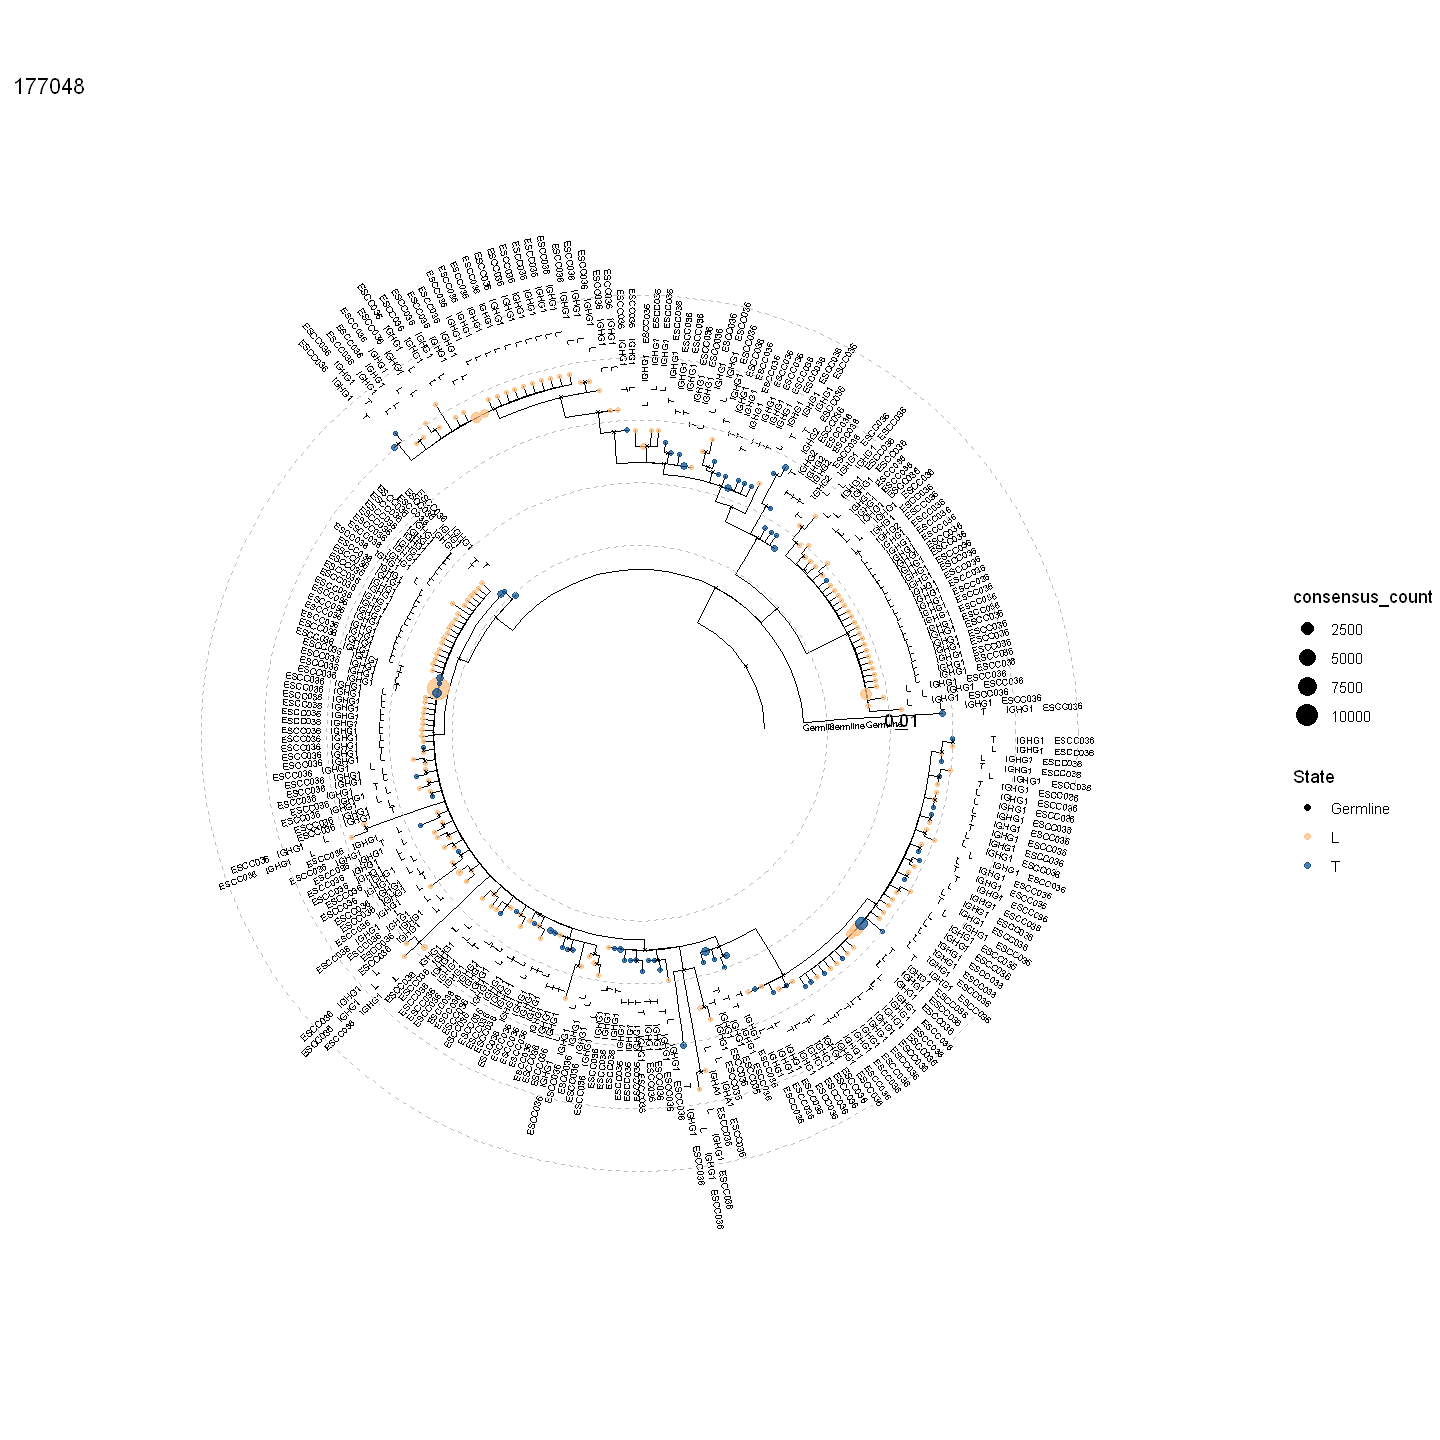

In [11]:
options(repr.plot.width = 12, repr.plot.height = 12)

p1 = plotTrees(clone1_1000_tree_data,tips="type",tip_palette=custom_palette_tissue,labelsize=1,tipsize ="consensus_count" ,layout = "circular")#tipsize="consensus_count",

p1$data$patient=substr(p1$data$patient,5,7)

p1<-p1[[selected_clone_pos]]+
#geom_tiplab(offset=0.05,size=2)+
geom_tiplab(aes(label=c_call),offset = 0.05,size=2)+
geom_tiplab(aes(label=tissue),offset = 0.03,size=2)+
geom_tiplab(aes(label=patient),offset = 0.08,size=2)+
geom_vline(xintercept=c(0.05,0.1,0.15,0.2,0.25,0.4,0.6,0.8),linetype="dashed",color="grey") + 
geom_nodepoint(size=.5,col="black",shape=4)+
xlim(-0.1,0.3)

p1

Warning message:
"Removed 1 rows containing missing values (geom_point_g_gtree)."
Warning message:
"Removed 3 rows containing missing values (geom_vline)."
Warning message:
"Removed 1 rows containing missing values (geom_point_g_gtree)."
Warning message:
"Removed 3 rows containing missing values (geom_vline)."


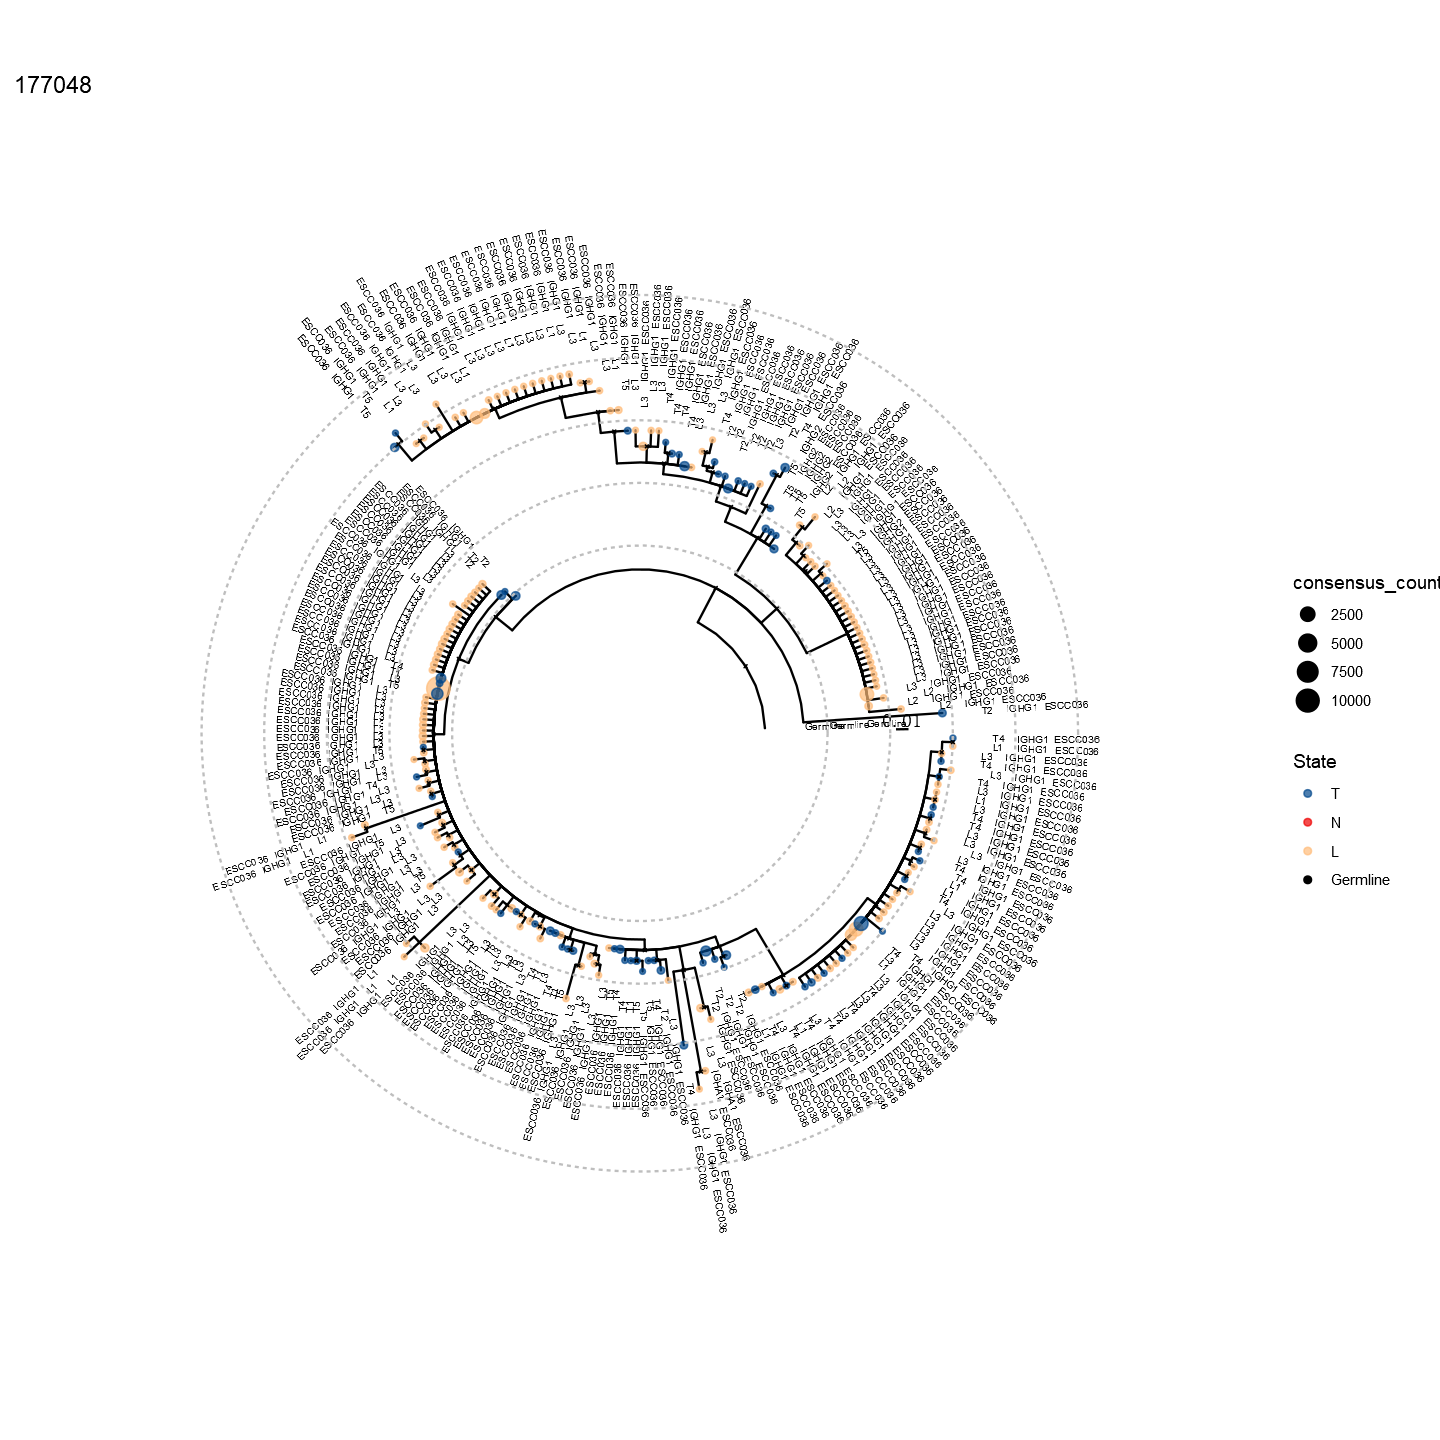

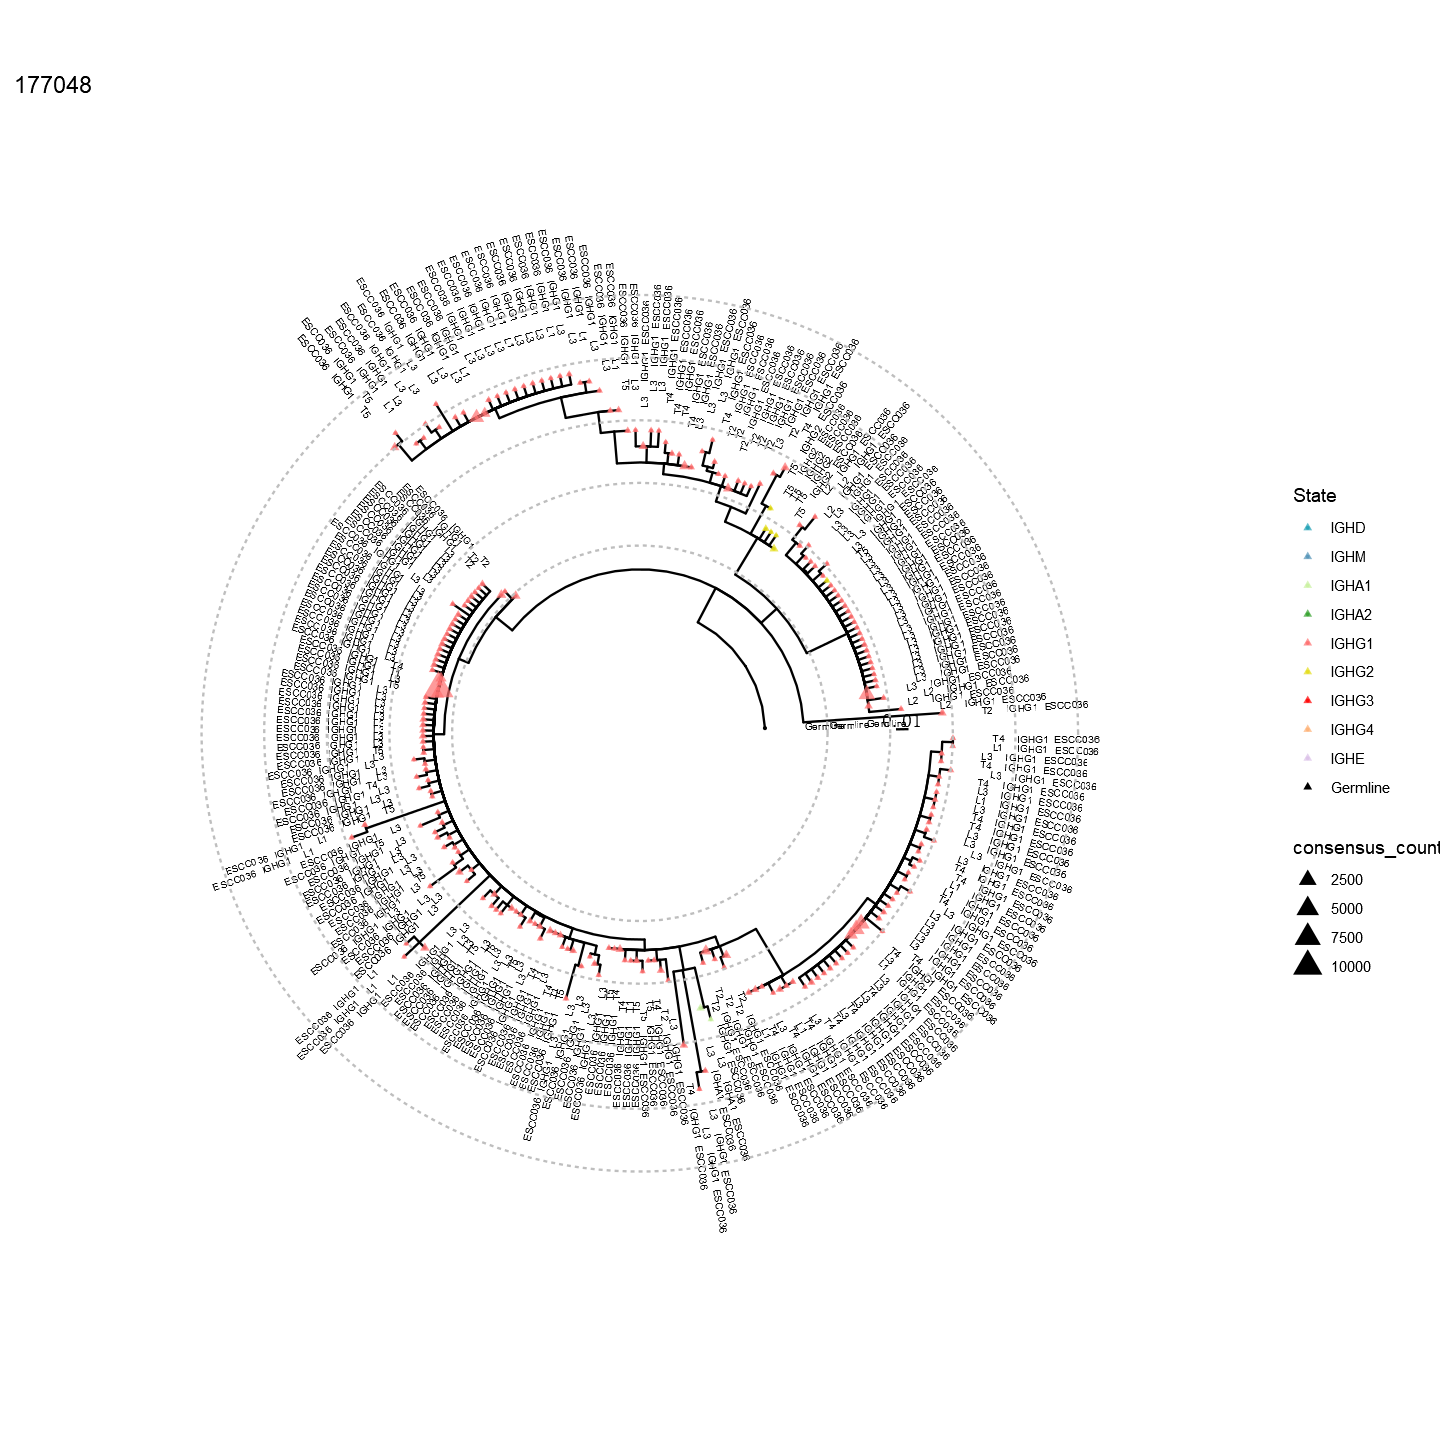

In [37]:
options(repr.plot.width = 12, repr.plot.height = 12)

p1 = plotTrees(clone1_1000_tree_data,tips="type",tip_palette=custom_palette_tissue,labelsize=1,tipsize ="consensus_count" ,layout = "circular")#tipsize="consensus_count",

p1<-p1[[selected_clone_pos]]+
#geom_tiplab(offset=0.05,size=2)+
geom_tiplab(aes(label=c_call),offset = 0.05,size=2)+
geom_tiplab(aes(label=tissue),offset = 0.03,size=2)+
geom_tiplab(aes(label=patient),offset = 0.08,size=2)+
geom_vline(xintercept=c(0.05,0.1,0.15,0.2,0.25,0.4,0.6,0.8),linetype="dashed",color="grey") + 
geom_nodepoint(size=.5,col="black",shape=4)+
xlim(-0.1,0.3)

p1


p2 = plotTrees(clone1_1000_tree_data,tips="c_call",tip_palette=custom_palette_ccall,labelsize=1 ,tipsize =0.1 ,layout = "circular")#tipsize="consensus_count",
p2<-p2[[selected_clone_pos]]+
#geom_tiplab(offset=0.01,size=2)+
geom_tiplab(aes(label=c_call),offset = 0.05,size=2)+
geom_tiplab(aes(label=tissue),offset = 0.03,size=2)+
geom_tiplab(aes(label=patient),offset = 0.08,size=2)+
geom_tippoint(shape=17,aes(size=consensus_count,col=c_call))+
#geom_tiplab(aes(label=junction_aa),offset = 0.1,size=2)+
geom_vline(xintercept=c(0.05,0.1,0.15,0.2,0.25,0.4,0.6,0.8),linetype="dashed",color="grey") + 
xlim(-0.1,0.3)

p2

In [38]:
pdf("ESCC036_clone_177048.pdf",12,12)
p1
p2
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point_g_gtree)."
Warning message:
"Removed 3 rows containing missing values (geom_vline)."
Warning message:
"Removed 1 rows containing missing values (geom_point_g_gtree)."
Warning message:
"Removed 3 rows containing missing values (geom_vline)."


png 
  2